# Case Study - spam detection with word2Vec Embeddings

The main aim of this project is to demonstrate the NLP for a Text Classification Problem

We will follow the below steps - 

1. Load the given data
2. EDA
3. Segregate the inputs and outputs
4. Split the data into training and testing data
5. Data Transformation
       TExt Preprocessing
   Text Vectorization
6. Model building
7. prediction
8. Evaluation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('email_data.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


In [2]:
df.shape

(5171, 4)

In [3]:
df['label'].value_counts()

label
ham     3672
spam    1499
Name: count, dtype: int64

In [4]:
df['label'].value_counts(normalize=True)

label
ham     0.710114
spam    0.289886
Name: proportion, dtype: float64

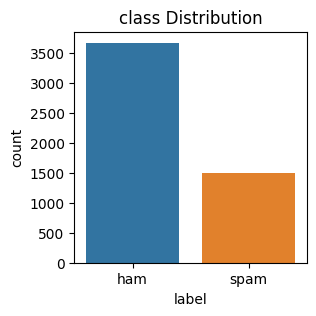

In [5]:
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('class Distribution')
sns.countplot(data=df, x='label')
plt.show()

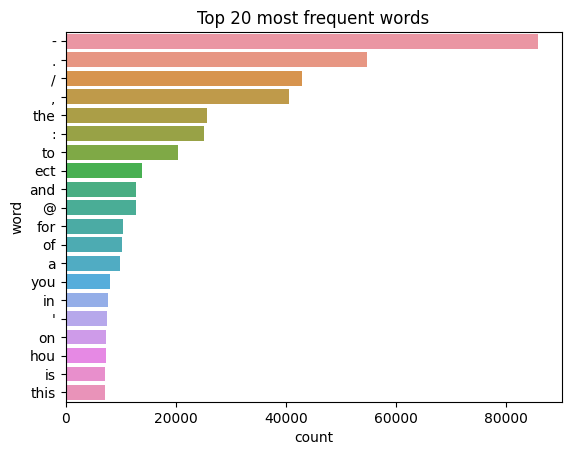

In [6]:
# visualizing the distribution of most frequent words
# Bag of words 
from collections import Counter
all_words = " ".join(df['text'].values).split()
word_counts = Counter(all_words) #all words count
common_words = word_counts.most_common(20)#common words with count
common_words_df = pd.DataFrame(common_words, columns=['word','count'])
sns.barplot(data=common_words_df, x = 'count', y='word')
plt.title('Top 20 most frequent words')
plt.show()

In [7]:
from wordcloud import WordCloud


In [8]:
wc = WordCloud(width=1600, height=800).generate(' '.join(df['text']))

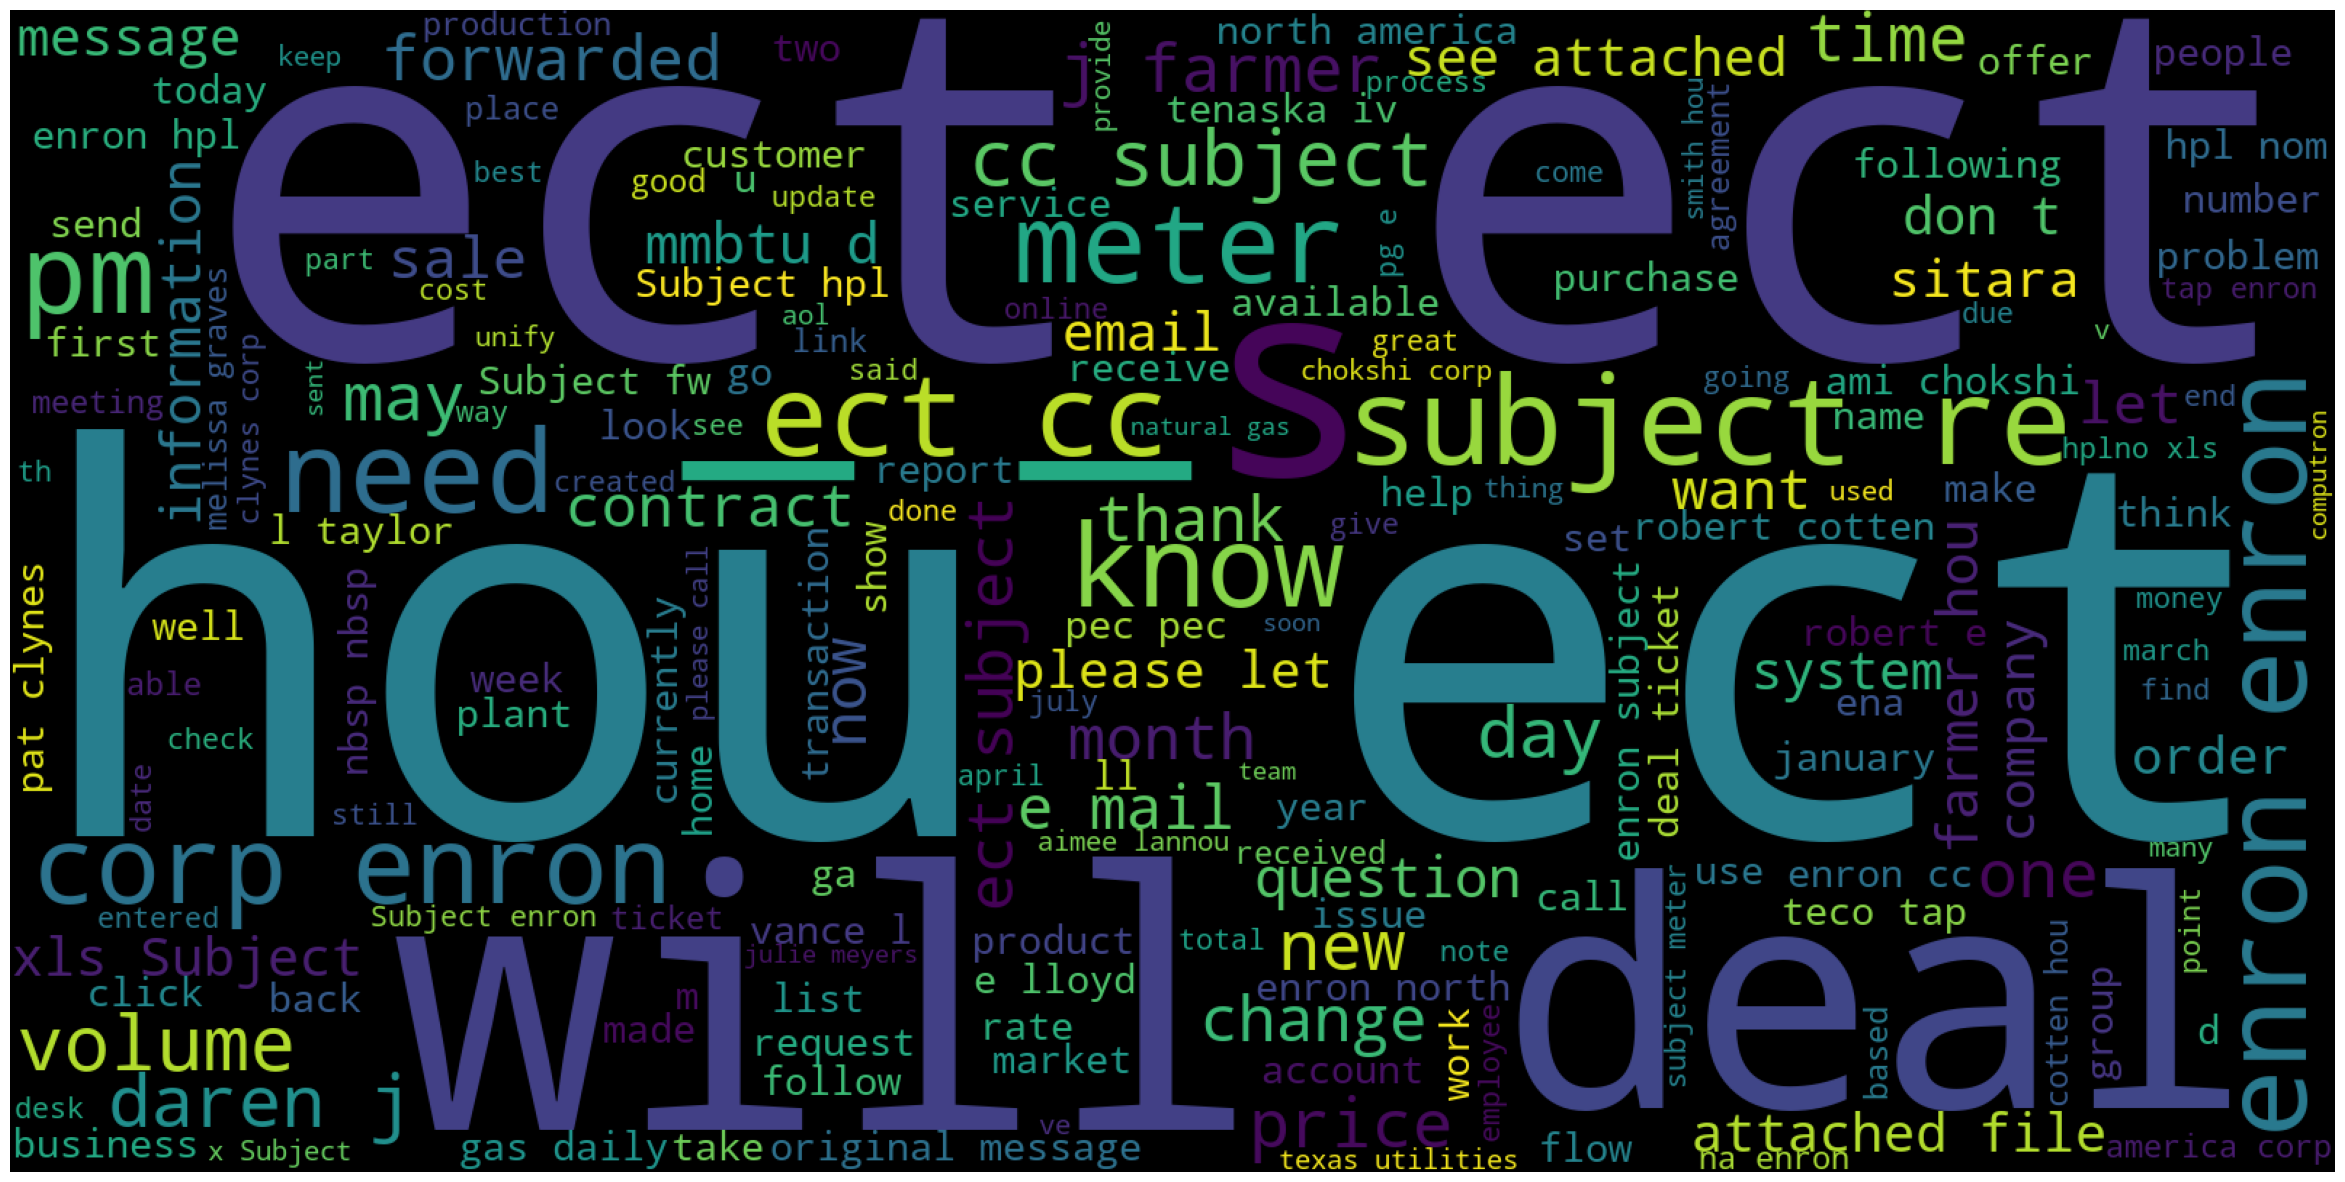

In [9]:
plt.figure(1, figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

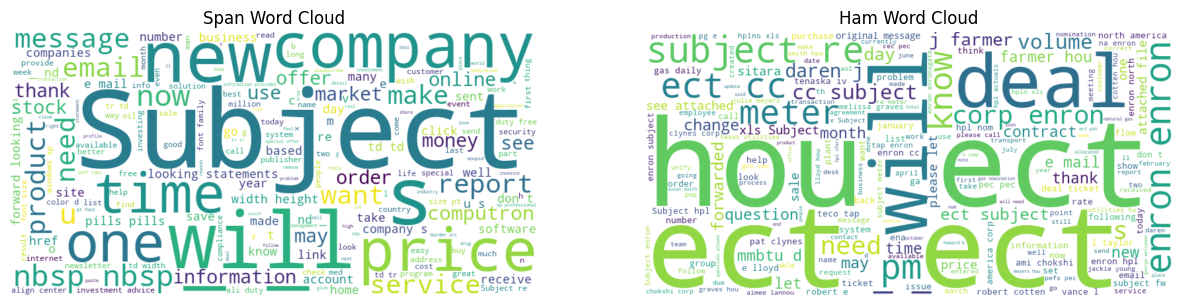

In [10]:
spam_text = " ".join(df[df['label'] == 'spam']['text'].values)
spam_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(spam_text)
ham_text = " ".join(df[df['label'] == 'ham']['text'].values)
ham_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(ham_text)

# Display the word cloud
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].imshow(spam_wordcloud, interpolation='bilinear')
ax[0].axis("off")
ax[0].set_title("Span Word Cloud")

ax[1].imshow(ham_wordcloud, interpolation='bilinear')
ax[1].axis("off")
ax[1].set_title("Ham Word Cloud")
plt.show()


In [11]:
# spliting the data into x and y
y = df['label']
x = df[['text']]
print(y.head)
print('')
print(x.head)


<bound method NDFrame.head of 0        ham
1        ham
2        ham
3       spam
4        ham
        ... 
5166     ham
5167     ham
5168     ham
5169     ham
5170    spam
Name: label, Length: 5171, dtype: object>

<bound method NDFrame.head of                                                    text
0     Subject: enron methanol ; meter # : 988291\nth...
1     Subject: hpl nom for january 9 , 2001\n( see a...
2     Subject: neon retreat\nho ho ho , we ' re arou...
3     Subject: photoshop , windows , office . cheap ...
4     Subject: re : indian springs\nthis deal is to ...
...                                                 ...
5166  Subject: put the 10 on the ft\nthe transport v...
5167  Subject: 3 / 4 / 2000 and following noms\nhpl ...
5168  Subject: calpine daily gas nomination\n>\n>\nj...
5169  Subject: industrial worksheets for august 2000...
5170  Subject: important online banking alert\ndear ...

[5171 rows x 1 columns]>


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42, stratify =y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4136, 1) (1035, 1) (4136,) (1035,)


In [13]:

print(x_train.columns)

Index(['text'], dtype='object')


In [14]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [15]:
def clean(doc):
    regex = "[^a-zA-Z]"
    doc = re.sub(regex, " ", doc) #applying regex
    doc = doc.lower() #converting to lower
    tokens = nltk.word_tokenize(doc) #word tokenization
    stop_words = list(set(stopwords.words('english'))) #Stop words
    custom_stop_words = ['subject', 'ect', 'hou'] #additonal stop words
    stop_words = stop_words + custom_stop_words 
    filtered_tokens = [word for word in tokens if word not in stop_words] #filtered stop_words
    lemmatized_tokens = [ lemmatizer.lemmatize(token) for token in filtered_tokens] #lemmatizing words
    return " ".join(lemmatized_tokens) 

In [16]:
#!pip install tqdm
from tqdm import tqdm, tqdm_notebook


In [17]:
tqdm.pandas()
x_train['clean_text'] = x_train['text'].progress_apply(lambda doc: clean(doc))
x_train.head(10)

100%|██████████████████████████████████████| 4136/4136 [00:14<00:00, 285.19it/s]


,text,clean_text
656,Subject: re : the hstoett lady sucklng huge cc...,hstoett lady sucklng huge ccok pleasure squire...
4752,"Subject: lose 19 % , powerful weightloss now a...",lose powerful weightloss available hello speci...
4483,"Subject: 98 - 2601\nhi daren ,\ni ' m attempti...",hi daren attempting clear mentioned meter erro...
1109,Subject: 2 nd rev mar . 2000 josey ranch nom\n...,nd rev mar josey ranch nom forwarded susan tre...
711,Subject: lose it\nos effetiveeight os aaiabe w...,lose o effetiveeight o aaiabe withoutrescripti...
4839,"Subject: reply soon ! ! !\ndear sir ,\ni know ...",reply soon dear sir know email reach surprise ...
1923,"Subject: hpl nom for december 13 , 2000\n( see...",hpl nom december see attached file hplnl xl hp...
2263,"Subject: texas ena off - system rates\nhey , d...",texas ena system rate hey time monday talk ide...
337,"Subject: enron / hpl nom for december 20 , 200...",enron hpl nom december see attached file hplnl...
2809,Subject: yvette ooto\ni will be on vacation mo...,yvette ooto vacation monday april th thru frid...


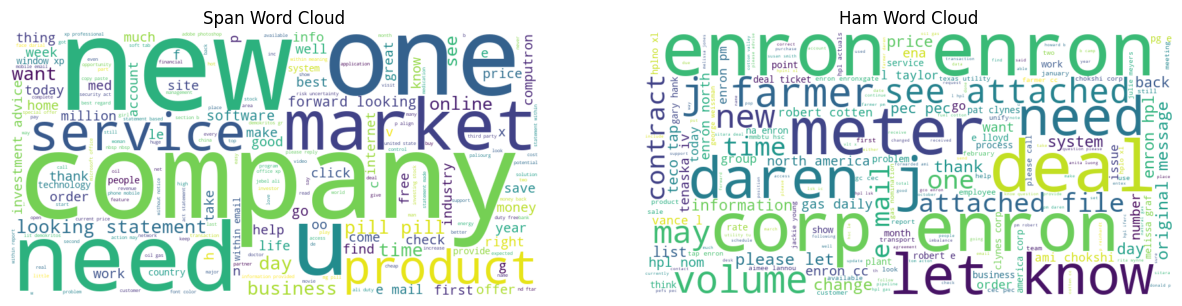

In [22]:
spam_text = " ".join(x_train[y_train == 'spam']['clean_text'].values)
spam_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(spam_text)
ham_text = " ".join(x_train[y_train == 'ham']['clean_text'].values)
ham_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(ham_text)

# Display the word cloud
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].imshow(spam_wordcloud, interpolation='bilinear')
ax[0].axis("off")
ax[0].set_title("Span Word Cloud")

ax[1].imshow(ham_wordcloud, interpolation='bilinear')
ax[1].axis("off")
ax[1].set_title("Ham Word Cloud")
plt.show()


In [24]:
x_train

,text,clean_text
656,Subject: re : the hstoett lady sucklng huge cc...,hstoett lady sucklng huge ccok pleasure squire...
4752,"Subject: lose 19 % , powerful weightloss now a...",lose powerful weightloss available hello speci...
4483,"Subject: 98 - 2601\nhi daren ,\ni ' m attempti...",hi daren attempting clear mentioned meter erro...
1109,Subject: 2 nd rev mar . 2000 josey ranch nom\n...,nd rev mar josey ranch nom forwarded susan tre...
711,Subject: lose it\nos effetiveeight os aaiabe w...,lose o effetiveeight o aaiabe withoutrescripti...
...,...,...
2622,Subject: confirming requisitions\nconfirming t...,confirming requisition confirming open requist...
977,Subject: check the superb specials on top - se...,check superb special top selling r xdrugs dema...
3111,Subject: union carbide - seadrift hpl meter # ...,union carbide seadrift hpl meter union carbide...
4569,Subject: re : personal information needs to be...,personal information need updated fixed sap ab...


In [25]:
x_train['tokenized_sentences'] = x_train['clean_text'].apply(lambda doc: doc.split())
x_train

,text,clean_text,tokenized_sentences
656,Subject: re : the hstoett lady sucklng huge cc...,hstoett lady sucklng huge ccok pleasure squire...,"[hstoett, lady, sucklng, huge, ccok, pleasure,..."
4752,"Subject: lose 19 % , powerful weightloss now a...",lose powerful weightloss available hello speci...,"[lose, powerful, weightloss, available, hello,..."
4483,"Subject: 98 - 2601\nhi daren ,\ni ' m attempti...",hi daren attempting clear mentioned meter erro...,"[hi, daren, attempting, clear, mentioned, mete..."
1109,Subject: 2 nd rev mar . 2000 josey ranch nom\n...,nd rev mar josey ranch nom forwarded susan tre...,"[nd, rev, mar, josey, ranch, nom, forwarded, s..."
711,Subject: lose it\nos effetiveeight os aaiabe w...,lose o effetiveeight o aaiabe withoutrescripti...,"[lose, o, effetiveeight, o, aaiabe, withoutres..."
...,...,...,...
2622,Subject: confirming requisitions\nconfirming t...,confirming requisition confirming open requist...,"[confirming, requisition, confirming, open, re..."
977,Subject: check the superb specials on top - se...,check superb special top selling r xdrugs dema...,"[check, superb, special, top, selling, r, xdru..."
3111,Subject: union carbide - seadrift hpl meter # ...,union carbide seadrift hpl meter union carbide...,"[union, carbide, seadrift, hpl, meter, union, ..."
4569,Subject: re : personal information needs to be...,personal information need updated fixed sap ab...,"[personal, information, need, updated, fixed, ..."


# Word 2 Vec - Feature Transformation

In [26]:
from gensim.models import Word2Vec

In [27]:
%time word2vec_vect = Word2Vec(x_train['tokenized_sentences'], vector_size=300, min_count=1)
print(word2vec_vect)

CPU times: user 4.62 s, sys: 49.5 ms, total: 4.67 s
Wall time: 1.84 s
Word2Vec<vocab=37314, vector_size=300, alpha=0.025>


In [28]:
print(f"Number of documents used for training : {word2vec_vect.corpus_count}")
print()
print(f"Vocabulary size: {len(word2vec_vect.wv.index_to_key)}")
print()
print(f"vector size: {word2vec_vect.vector_size}")

Number of documents used for training : 4136

Vocabulary size: 37314

vector size: 300


In [32]:
def get_document_vector(doc, model):
    tokens = [word for word in doc if word in model]
    # Create document vector by averaging word vector 300 Dimension (word vector)
    if tokens:
        doc_embedding = np.mean(model[tokens], axis= 0)
    else:
        doc_embedding = np.zeros(model.vector_size)
    return doc_embedding

    
    
    


In [33]:
x_train['w2v_doc_embedding'] = x_train['tokenized_sentences'].apply(lambda doc:get_document_vector(doc, word2vec_vect.wv))
                                                                    

In [34]:
x_train

,text,clean_text,tokenized_sentences,w2v_doc_embedding
656,Subject: re : the hstoett lady sucklng huge cc...,hstoett lady sucklng huge ccok pleasure squire...,"[hstoett, lady, sucklng, huge, ccok, pleasure,...","[0.007976408, 0.0848231, 0.026591917, 0.053741..."
4752,"Subject: lose 19 % , powerful weightloss now a...",lose powerful weightloss available hello speci...,"[lose, powerful, weightloss, available, hello,...","[0.10351523, 0.30528516, -0.003975395, 0.14827..."
4483,"Subject: 98 - 2601\nhi daren ,\ni ' m attempti...",hi daren attempting clear mentioned meter erro...,"[hi, daren, attempting, clear, mentioned, mete...","[0.06283974, 0.6669294, -0.20714606, 0.3231288..."
1109,Subject: 2 nd rev mar . 2000 josey ranch nom\n...,nd rev mar josey ranch nom forwarded susan tre...,"[nd, rev, mar, josey, ranch, nom, forwarded, s...","[-0.09051975, 0.50952023, -0.019778842, 0.2239..."
711,Subject: lose it\nos effetiveeight os aaiabe w...,lose o effetiveeight o aaiabe withoutrescripti...,"[lose, o, effetiveeight, o, aaiabe, withoutres...","[0.028930029, 0.100805245, 0.03270558, 0.07260..."
...,...,...,...,...
2622,Subject: confirming requisitions\nconfirming t...,confirming requisition confirming open requist...,"[confirming, requisition, confirming, open, re...","[-0.01247159, 0.5054142, -0.10589543, 0.263680..."
977,Subject: check the superb specials on top - se...,check superb special top selling r xdrugs dema...,"[check, superb, special, top, selling, r, xdru...","[0.08150995, 0.2674071, 0.009215095, 0.1306454..."
3111,Subject: union carbide - seadrift hpl meter # ...,union carbide seadrift hpl meter union carbide...,"[union, carbide, seadrift, hpl, meter, union, ...","[-0.027113514, 0.7319889, -0.25377962, 0.30188..."
4569,Subject: re : personal information needs to be...,personal information need updated fixed sap ab...,"[personal, information, need, updated, fixed, ...","[-0.037829492, 0.6172608, -0.14499052, 0.27627..."


# Test Data Set

In [35]:
x_test['clean_text'] = x_test['text'].progress_apply(lambda doc: clean(doc))
x_test.head(10)

100%|██████████████████████████████████████| 1035/1035 [00:03<00:00, 307.49it/s]


,text,clean_text
774,Subject: final cp name change and merger repor...,final cp name change merger report clarify feb...
2630,Subject: calpine daily gas nomination\n- hidal...,calpine daily gas nomination hidalgo daily gas...
2543,Subject: calpine daily gas nomination\n>\naime...,calpine daily gas nomination aimee office frid...
3291,"Subject: wells\ndaren , i think i may have los...",well daren think may lost mind comment vance t...
5024,Subject: first deliveries - comstock oil & gas...,first delivery comstock oil gas hesco gatherin...
1623,Subject: 3 . 25 rate confirmation # 367886924 ...,rate confirmation jb wed jun hello sent email ...
4935,Subject: first delivery - rodessa operating co...,first delivery rodessa operating co see attach...
3241,Subject: new pan energy exchange deal meeting\...,new pan energy exchange deal meeting daren ple...
1504,Subject: announcement for february 7\nplease t...,announcement february please talk senior high ...
5015,Subject: highest gains without guesswork\nwysa...,highest gain without guesswork wysak petroleum...


In [37]:
x_test['tokenized_sentences'] = x_test['clean_text'].apply(lambda doc: doc.split())
x_test

,text,clean_text,tokenized_sentences
774,Subject: final cp name change and merger repor...,final cp name change merger report clarify feb...,"[final, cp, name, change, merger, report, clar..."
2630,Subject: calpine daily gas nomination\n- hidal...,calpine daily gas nomination hidalgo daily gas...,"[calpine, daily, gas, nomination, hidalgo, dai..."
2543,Subject: calpine daily gas nomination\n>\naime...,calpine daily gas nomination aimee office frid...,"[calpine, daily, gas, nomination, aimee, offic..."
3291,"Subject: wells\ndaren , i think i may have los...",well daren think may lost mind comment vance t...,"[well, daren, think, may, lost, mind, comment,..."
5024,Subject: first deliveries - comstock oil & gas...,first delivery comstock oil gas hesco gatherin...,"[first, delivery, comstock, oil, gas, hesco, g..."
...,...,...,...
1903,Subject: hpl fuel gas buy - back for december ...,hpl fuel gas buy back december fyi forwarded g...,"[hpl, fuel, gas, buy, back, december, fyi, for..."
1376,"Subject: re : exxon company , usa global # 960...",exxon company usa global sitara checked sitara...,"[exxon, company, usa, global, sitara, checked,..."
1905,Subject: i ' m glad we met\ntotally awesome\nc...,glad met totally awesome city city guide chic ...,"[glad, met, totally, awesome, city, city, guid..."
1846,"Subject: hpl nom for july 14 , 2000\n( see att...",hpl nom july see attached file hplo xl hplo xl,"[hpl, nom, july, see, attached, file, hplo, xl..."


In [38]:
x_test['w2v_doc_embedding'] = x_test['tokenized_sentences'].apply(lambda doc:get_document_vector(doc, word2vec_vect.wv))
                                                                    

In [39]:
x_test

,text,clean_text,tokenized_sentences,w2v_doc_embedding
774,Subject: final cp name change and merger repor...,final cp name change merger report clarify feb...,"[final, cp, name, change, merger, report, clar...","[0.15591325, 0.47344196, -0.098930344, 0.22945..."
2630,Subject: calpine daily gas nomination\n- hidal...,calpine daily gas nomination hidalgo daily gas...,"[calpine, daily, gas, nomination, hidalgo, dai...","[-0.2699872, 0.67134833, -0.41912925, 0.038549..."
2543,Subject: calpine daily gas nomination\n>\naime...,calpine daily gas nomination aimee office frid...,"[calpine, daily, gas, nomination, aimee, offic...","[-0.024723481, 0.48741361, -0.15294656, 0.1305..."
3291,"Subject: wells\ndaren , i think i may have los...",well daren think may lost mind comment vance t...,"[well, daren, think, may, lost, mind, comment,...","[0.13263293, 0.68427336, -0.2604932, 0.2995968..."
5024,Subject: first deliveries - comstock oil & gas...,first delivery comstock oil gas hesco gatherin...,"[first, delivery, comstock, oil, gas, hesco, g...","[0.041544933, 0.8007001, -0.15662731, 0.169998..."
...,...,...,...,...
1903,Subject: hpl fuel gas buy - back for december ...,hpl fuel gas buy back december fyi forwarded g...,"[hpl, fuel, gas, buy, back, december, fyi, for...","[-0.18108092, 0.65482426, -0.067055404, 0.2889..."
1376,"Subject: re : exxon company , usa global # 960...",exxon company usa global sitara checked sitara...,"[exxon, company, usa, global, sitara, checked,...","[0.082396895, 0.6384567, -0.15547651, 0.302011..."
1905,Subject: i ' m glad we met\ntotally awesome\nc...,glad met totally awesome city city guide chic ...,"[glad, met, totally, awesome, city, city, guid...","[0.083504215, 0.28770614, -0.0137924515, 0.128..."
1846,"Subject: hpl nom for july 14 , 2000\n( see att...",hpl nom july see attached file hplo xl hplo xl,"[hpl, nom, july, see, attached, file, hplo, xl...","[0.114787176, 1.2854118, -0.33373076, -0.13038..."


# Model building

In [40]:
#  RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

classifier = RandomForestClassifier()
%time classifier.fit(list(x_train['w2v_doc_embedding']), y_train)
y_pred = classifier.predict(list(x_test['w2v_doc_embedding']))
print(y_pred)
print()
print(f'Model accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print()
print(f"Model's Clasfification performance: {metrics.classification_report(y_test, y_pred)}")
                    

CPU times: user 2.47 s, sys: 11.7 ms, total: 2.48 s
Wall time: 2.49 s
['ham' 'ham' 'ham' ... 'spam' 'ham' 'spam']

Model accuracy: 0.9526570048309179

Model's Clasfification performance:               precision    recall  f1-score   support

         ham       0.96      0.97      0.97       735
        spam       0.93      0.91      0.92       300

    accuracy                           0.95      1035
   macro avg       0.95      0.94      0.94      1035
weighted avg       0.95      0.95      0.95      1035

